In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 1. 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# 2. 划分数据集，训练集比例 0.2，随机种子 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 创建 SVM 模型，使用线性核函数
svm_model = SVC(kernel='linear', random_state=42)

# 4. 训练模型
svm_model.fit(X_train, y_train)

# 5. 进行预测
y_pred = svm_model.predict(X_test)

# 6. 评估模型
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 对每个类的召回率取平均
f1 = f1_score(y_test, y_pred, average='macro')  # 对每个类的F1 score取平均
conf_matrix = confusion_matrix(y_test, y_pred)

# 7. 输出评估指标
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


D:\sthinpython\.venv\Lib\site-packages\sklearn\datasets\_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5975967
  warnings.warn(f"Retry downloading from url: {remote.url}")


类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fea

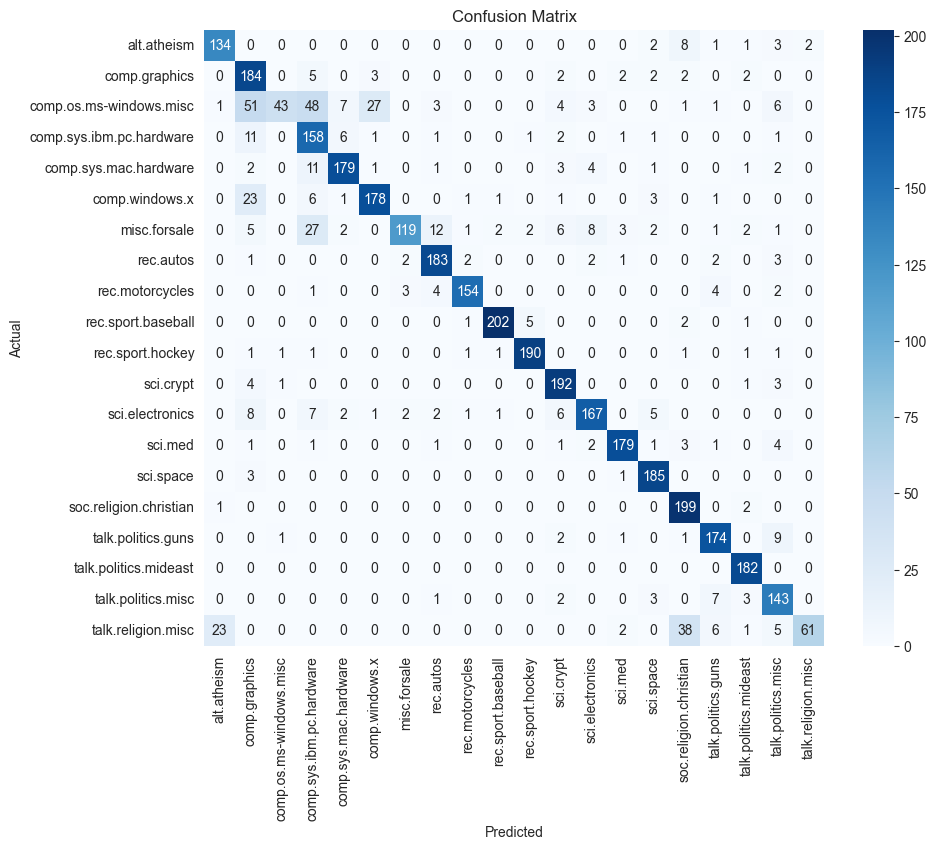

In [2]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 1. 导入数据集
newsgroups = fetch_20newsgroups(subset='all')
print("类别标签:", newsgroups.target_names)
print("数据集描述:", newsgroups.DESCR)

# 查看样本
print("\n数据样本:")
for i in range(2):
    print(f"样本 {i}: {newsgroups.data[i]}")

# 2. 将文本数据转换为词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# 3. 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 创建并训练朴素贝叶斯分类器
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# 5. 进行预测
y_pred = classifier.predict(X_test)

# 6. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 7. 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

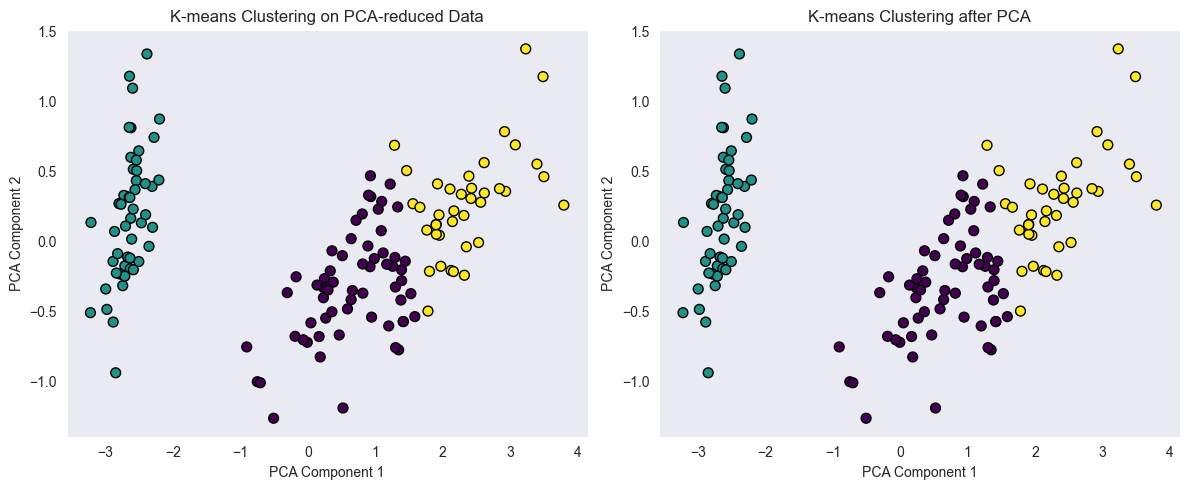

Silhouette Score (Original Data): 0.5512
Silhouette Score (PCA Data): 0.5512


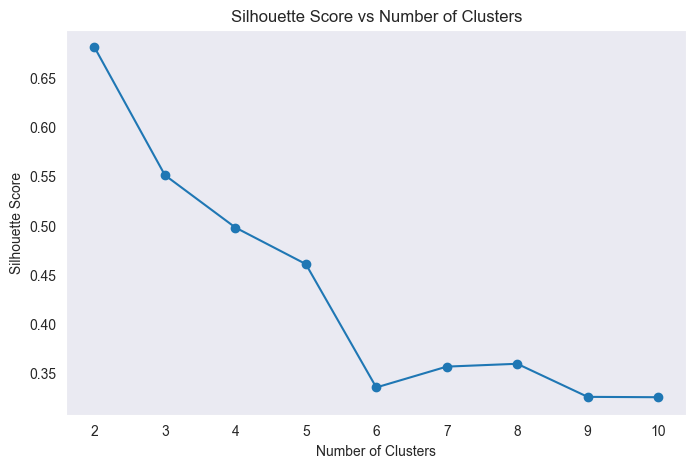

In [3]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. 导入数据集
data = load_iris()
X = data.data
y = data.target

# 2. 使用K-means聚类，将数据分为3个簇，设置随机种子为0
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# 3. PCA 降维到2维空间，并输出可视化结果
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))

# 原始数据聚类结果可视化
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering on PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()

# 4. 尝试先降维，再聚类
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_

# PCA后的聚类结果可视化
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()

plt.tight_layout()
plt.show()

# 5. 计算并输出轮廓系数
silhouette_original = silhouette_score(X, labels)
silhouette_pca = silhouette_score(X, labels_pca)

print(f"Silhouette Score (Original Data): {silhouette_original:.4f}")
print(f"Silhouette Score (PCA Data): {silhouette_pca:.4f}")

# 6. 绘制轮廓系数与聚类数的关系图
range_n_clusters = range(2, 11)
silhouette_avg_list = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg_list, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()